In [1]:
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv'
filename = 'cars_clus.csv'
df=urllib.request.urlretrieve(url, filename)
import pandas as pd
pdf = pd.read_csv(filename)
pdf

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


# EDA

### 1. Analizar duplicados, nulos, presencia de anomalías.
### 2. Aplicar distintos métodos y atributos como shape, dtypes, info, describe() para entender la forma de estos datos
### 3. Utilizar value_counts() para encontrar cantidad de modelos y fabricantes disponibles.

In [2]:
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [5]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [7]:
pdf.nunique()

manufact      30
model        158
sales        158
resale       118
type           3
price        154
engine_s      32
horsepow      69
wheelbas      90
width         80
length       130
curb_wgt     149
fuel_cap      56
mpg           24
lnsales      151
partition      2
dtype: int64

### Preliminary analysis:
- "Manufact" is the only column containing nans.
- From the top rows we see there are cells with $null$ values. Which is probably what makes the columns we expect would be floats into objects.

In [12]:
## we apply to_numeric to ensure that all columns are numeric and coerce invalid values to NaN
pdf.drop(['manufact', 'model'], axis=1).apply(pd.to_numeric, errors='coerce').isnull().sum()

sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

Above we see the values that we would expect to be numeric turned to NaNs if they aren't ($null$ for example)

In [8]:
pdf.duplicated(subset=['manufact', 'model']).sum()

0

In [22]:
pdf['manufact'].value_counts(dropna=False)

manufact
Dodge            11
Ford             11
Mercedes-Benz     9
Chevrolet         9
Toyota            9
Nissan            7
Chrysler          7
Mitsubishi        7
Volkswagen        6
Lexus             6
Mercury           6
Pontiac           6
Oldsmobile        6
Volvo             6
Saturn            5
Honda             5
Cadillac          5
Plymouth          4
Buick             4
Acura             4
Porsche           3
Lincoln           3
Audi              3
Jeep              3
Hyundai           3
BMW               3
Saab              2
Subaru            2
NaN               2
Jaguar            1
Infiniti          1
Name: count, dtype: int64

In [19]:
pdf.model.value_counts()

model
Neon          2
Integra       1
Intrigue      1
Altima        1
Maxima        1
             ..
Expedition    1
Ranger        1
F-Series      1
Civic         1
newTruck      1
Name: count, Length: 158, dtype: int64

In [21]:
pdf.model.sort_values().unique()

array(['3000GT', '300M', '323i', '328i', '4Runner', '528i', '9-3', '9-5',
       'A4', 'A6', 'A8', 'Accent', 'Accord', 'Alero', 'Altima', 'Aurora',
       'Avalon', 'Avenger', 'Beetle', 'Bonneville', 'Boxter', 'Bravada',
       'Breeze', 'C-Class', 'C70', 'CL', 'CL500', 'CLK Coupe', 'CR-V',
       'Cabrio', 'Camaro', 'Camry', 'Caravan', 'Carrera Cabriolet',
       'Carrera Coupe', 'Catera', 'Cavalier', 'Celica', 'Century',
       'Cherokee', 'Cirrus', 'Civic', 'Concorde', 'Continental',
       'Contour', 'Corolla', 'Corvette', 'Cougar', 'Crown Victoria',
       'Cutlass', 'Dakota', 'DeVille', 'Diamante', 'Durango', 'E-Class',
       'ES300', 'Eclipse', 'Elantra', 'Eldorado', 'Escalade', 'Escort',
       'Expedition', 'Explorer', 'F-Series', 'Firebird', 'Focus',
       'Forester', 'Frontier', 'GS300', 'GS400', 'GTI', 'Galant', 'Golf',
       'Grand Am', 'Grand Cherokee', 'Grand Marquis', 'Grand Prix', 'I30',
       'Impala', 'Integra', 'Intrepid', 'Intrigue', 'Jetta', 'LHS', 'LS',
     

In [24]:
pdf[pdf.manufact.isna()]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0
158,NaN,newTruck,$null$,$null$,$null$,34.200,3.500,167.000,109.800,75.200,188.400,4.508,17.200,26.000,$null$,1.0


### null values and frequency analysis

- no duplicates with same manufacturer and model found
- the most common manufacturer are Dodge and Ford
- visual inspection shows that manufact is standardized (no variations in how values are written)
- same with model. Seems to be standardized
- nan values for manufact show "newCar" and "newTruck" models. With significant null values related to sales.


# Processing

<Axes: >

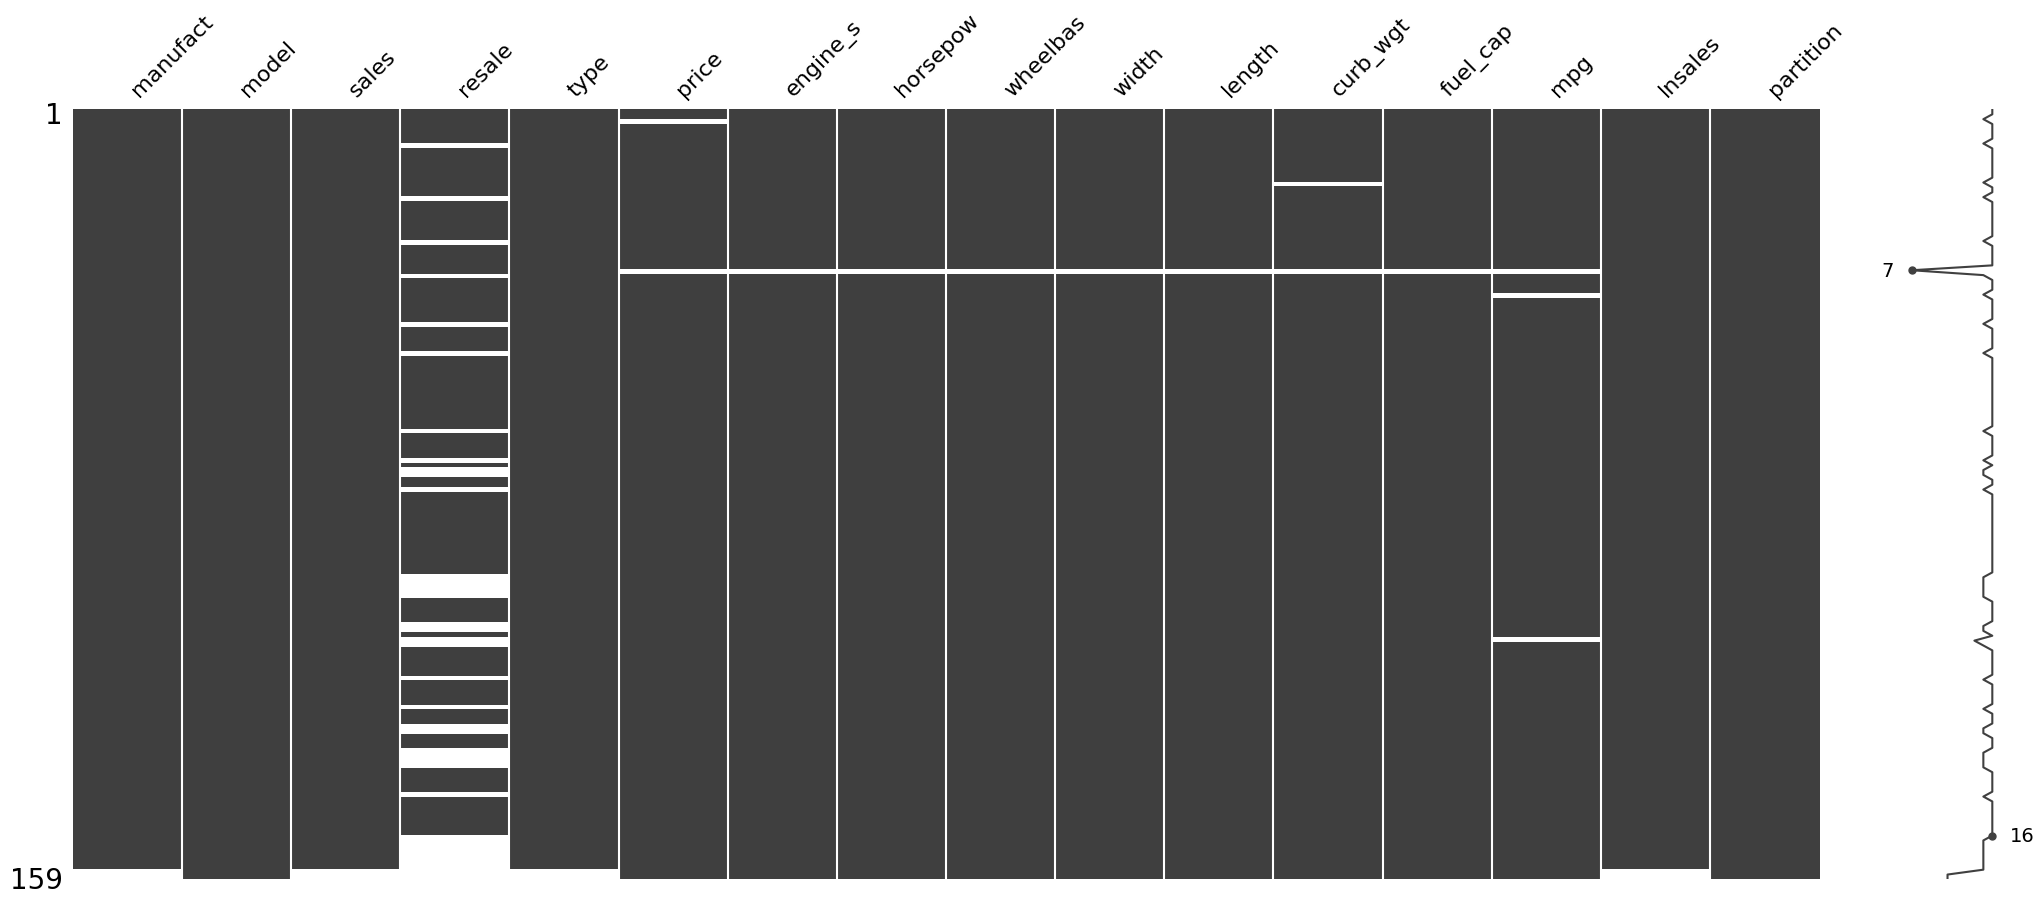

In [5]:
import missingno as msno

## convert numerical values to float and coerce invalid values to NaN for numeric columns
pdf_num = pdf.copy()
pdf_num[pdf_num.columns.drop(['manufact', 'model']).to_list()] = pdf_num.drop(['manufact', 'model'], axis=1).apply(pd.to_numeric, errors='coerce')

# visualize nulls
msno.matrix(pdf_num)


In [ ]:
pdf_num.dropna(inplace=True)
pdf_num.info()

In [41]:
# avg price per manufacturer in 1000s of USD
pdf_num.groupby('manufact').price.mean()

manufact
Acura            30.633333
Audi             39.980000
BMW              36.150000
Buick            26.781250
Cadillac         36.856667
Chevrolet        20.164375
Chrysler         22.280000
Dodge            24.170556
Ford             21.920500
Honda            20.277000
Hyundai          12.165667
Infiniti         29.465000
Jeep             20.991667
Lexus            41.105000
Lincoln          41.205000
Mercedes-Benz    58.487500
Mercury          20.748333
Mitsubishi       22.167429
Nissan           23.167200
Oldsmobile       27.829250
Plymouth         15.856667
Pontiac          22.412000
Porsche          62.473333
Saturn           12.503333
Toyota           21.934750
Volkswagen       18.058000
Name: price, dtype: float64

In [ ]:
# increase prices by 5%
pdf_num['new_price'] = pdf_num.price.apply(lambda x: x*1.05)

In [46]:
# statistical description of horsepow and mpg grouped by manufacturer
pdf_num.groupby('manufact')[['horsepow', 'mpg']].describe()

horsepow                                                        \
                 count        mean         std    min     25%    50%     75%   
manufact                                                                       
Acura              3.0  191.666667   45.368859  140.0  175.00  210.0  217.50   
Audi               3.0  220.000000   81.853528  150.0  175.00  200.0  255.00   
BMW                2.0  193.000000    0.000000  193.0  193.00  193.0  193.00   
Buick              4.0  206.250000   26.575365  175.0  197.50  205.0  213.75   
Cadillac           3.0  250.000000   43.301270  200.0  237.50  275.0  275.00   
Chevrolet          8.0  170.000000   84.852814   55.0  118.75  172.5  185.00   
Chrysler           5.0  183.200000   45.866109  132.0  163.00  168.0  200.00   
Dodge              9.0  195.888889  100.258970  120.0  150.00  168.0  175.00   
Ford              10.0  176.400000   43.097306  110.0  151.25  180.0  207.50   
Honda              5.0  160.400000   45.445572  106.0  135.00  146.0  205.00   
Hyundai            3.0  126.666667   30.287511   92.0  116.00  140.0  144.00   
Infiniti           1.0  227.000000         NaN  227.0  227.00  227.0  227.00   
Jeep               3.0  168.333333   41.932485  120.0  155.00  190.0  192.50   
Lexus              3.0  241.666667   42.524503  210.0  217.50  225.0  257.50   
Lincoln            2.0  245.000000   42.426407  215.0  230.00  245.0  260.00   
Mercedes-Benz      4.0  245.750000   52.671150  185.0  212.00  248.0  281.75   
Mercury            6.0  163.833333   36.361610  125.0  132.00  161.5  192.50   
Mitsubishi         7.0  165.142857   33.052628  113.0  149.50  161.0  186.50   
Nissan             5.0  168.600000   34.839633  126.0  155.00  170.0  170.00   
Oldsmobile         4.0  193.750000   41.508031  150.0  176.25  187.5  205.00   
Plymouth           3.0  138.000000   10.392305  132.0  132.00  132.0  141.00   
Pontiac            5.0  185.000000   22.638463  150.0  175.00  195.0  200.00   
Porsche            3.0  272.333333   47.920072  217.0  258.50  300.0  300.00   
Saturn             3.0  108.000000   13.856406  100.0  100.00  100.0  112.00   
Toyota             8.0  156.500000   40.609640  120.0  131.50  141.0  165.00   
Volkswagen         5.0  122.000000   15.652476  115.0  115.00  115.0  115.00   

                       mpg                                                 \
                 max count       mean       std   min    25%   50%    75%   
manufact                                                                    
Acura          225.0   3.0  25.000000  3.000000  22.0  23.50  25.0  26.50   
Audi           310.0   3.0  23.333333  3.214550  21.0  21.50  22.0  24.50   
BMW            193.0   2.0  24.400000  0.565685  24.0  24.20  24.4  24.60   
Buick          240.0   4.0  24.250000  0.957427  23.0  23.75  24.5  25.00   
Cadillac       275.0   3.0  22.000000  0.000000  22.0  22.00  22.0  22.00   
Chevrolet      345.0   8.0  28.625000  7.327785  22.0  25.00  26.0  28.50   
Chrysler       253.0   5.0  24.800000  1.643168  23.0  24.00  24.0  26.00   
Dodge          450.0   9.0  20.444444  4.927248  15.0  16.00  19.0  24.00   
Ford           240.0  10.0  22.100000  4.012481  16.0  19.50  22.0  24.00   
Honda          210.0   5.0  25.000000  4.847680  19.0  23.00  24.0  27.00   
Hyundai        148.0   3.0  27.666667  3.055050  25.0  26.00  27.0  29.00   
Infiniti       227.0   1.0  25.000000       NaN  25.0  25.00  25.0  25.00   
Jeep           195.0   3.0  18.666667  1.527525  17.0  18.00  19.0  19.50   
Lexus          290.0   3.0  22.666667  0.577350  22.0  22.50  23.0  23.00   
Lincoln        275.0   2.0  21.500000  0.707107  21.0  21.25  21.5  21.75   
Mercedes-Benz  302.0   4.0  23.000000  2.943920  20.0  20.75  23.0  25.25   
Mercury        210.0   6.0  23.666667  4.589844  18.0  21.00  22.5  27.00   
Mitsubishi     210.0   7.0  22.857143  3.933979  18.0  20.50  22.0  24.50   
Nissan         222.0   5.0  24.000000  4.242641  19.0  21.00  25.0  25.00   